In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('dados/tested.csv')
print(dados.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [34]:
idade_media = int(dados['Age'].mean())
sobreviventes = dados['Survived'][dados['Survived'] == 1]
print('Algumas estatisticas interessantes sobre o Titanic:\n')
print("sobreviveram " + str(sobreviventes.count()) + " pessoas")
print("idade media no barco era de "+ str(idade_media) +" anos")


Algumas estatisticas interessantes sobre o Titanic:

sobreviveram 152 pessoas
idade media no barco era de 30 anos


C:\Users\pedro\AppData\Local\Temp\ipykernel_552652\2430853739.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_sobreviventes = dfAgeSurv.groupby(['Survived','AgeCt']).count().unstack()


<Axes: xlabel='Survived'>

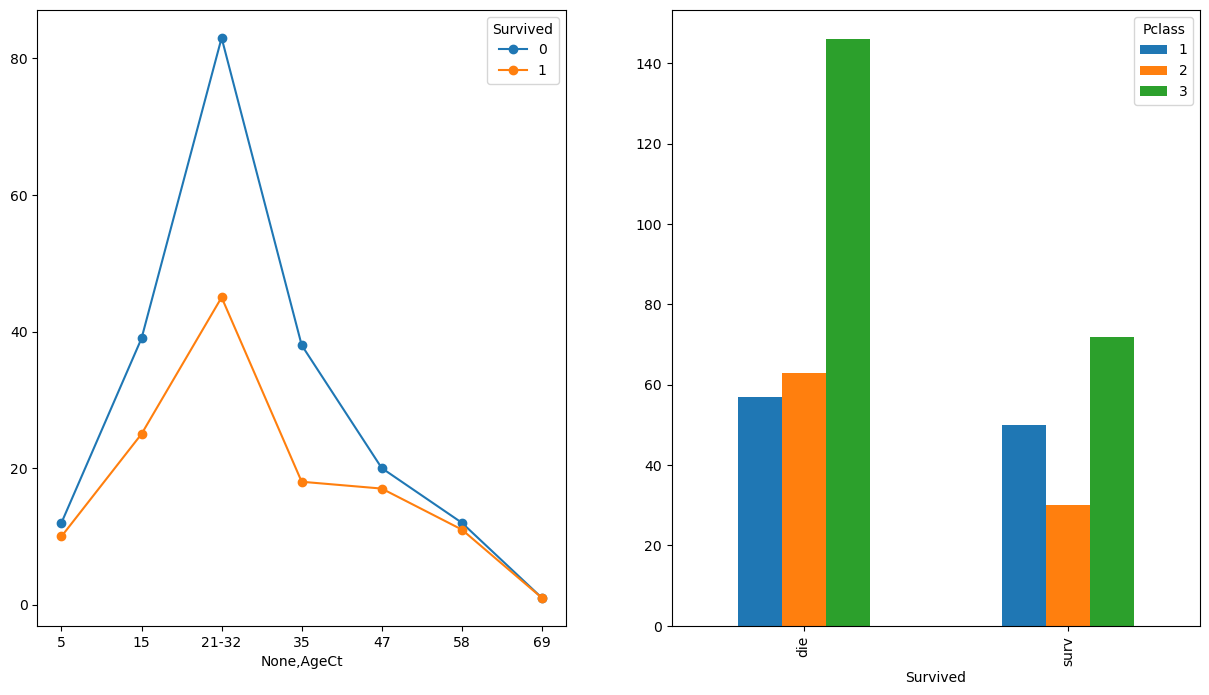

In [ ]:
#criando a figura e as subplotagens
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 8))

#dividindo as idades em intervalos
cats = pd.cut(dados['Age'], 7, precision=2)
categorias = [5,15,'21-32',35,47,58,69]

#agrupando baseado no intervalo e na sobrevivencia
dfAgeSurv = dados[['Age','Survived']].copy()
dfAgeSurv['AgeCt'] = cats
dfAgeSurv = dfAgeSurv.set_index('Survived')
idade_sobreviventes = dfAgeSurv.groupby(['Survived','AgeCt']).count().unstack()
#plot
idade_sobreviventes.T.plot(kind="line", marker="o", ax=axes[0]).set_xticks(ticks=range(len(categorias)), labels=categorias)

#agrupando baseado no na classe e na sobrevivencia
df_class_surv = dados[['Survived','Pclass']].copy()
df_class_surv['Survived'] = df_class_surv['Survived'].replace([0,1],['die','surv'])
df_class_surv = df_class_surv.groupby(['Survived', 'Pclass']).size().unstack()
#plot
df_class_surv.plot(kind = 'bar', ax= axes[1])
